In [1]:
from ardca import *

In [2]:
pf = "PF00014"
save_dir = "models"
file_path=f"../data/{pf}.fasta.gz"

In [3]:
version = 5

training_rowgap = TrainState(
    file_path=file_path,
    save_dir=save_dir,
    pf = pf,
    version=version,
    lambda_h=1e-6,
    lambda_J=1e-4,
    max_gap_fraction=1,
    max_col_gap_fraction=1,
    identity_thresh=0.8,
    val_frac=0.1,
    max_iters=10,
    optimizer="lbfgs",
    seed=42,
    device="cpu"
)

In [4]:
model, history, msa_data, tt = main_training_pipeline(training_rowgap)
print(f"Training completed in {tt:.2f} seconds")

Loading MSA data...
MSA shape: (13600, 53)
Effective sequences: 4248.8
Sequence length: 53
Alphabet size: 21
Training ArDCA model...
Epoch 0: Train Loss=89.267677, Train NLL=88.650497
         Val Loss=90.885765, Val NLL=90.268585, Perplexity=1.7827
Epoch 9: Train Loss=59.306080, Train NLL=54.854469
         Val Loss=89.076637, Val NLL=84.625031, Perplexity=1.7194
Evaluating model...
Final train NLL: 0.3202
Final val NLL: 0.5420
Final val perplexity: 1.7194
Model saved to models/ardca_PF00014_v5.pt
Training history saved to models/training_history_PF00014_v5.json
Training completed in 538.26 seconds


In [ ]:
version = 2

training_rowgap = TrainState(
    file_path=file_path,
    save_dir="./models",
    pf = pf,
    version=version,
    lambda_h=1e-6,
    lambda_J=1e-4,
    max_gap_fraction=0.1,
    max_col_gap_fraction=1,
    identity_thresh=0.8,
    val_frac=0.1,
    max_iters=200,
    optimizer="adam",
    seed=42,
    device="cpu"
)

In [ ]:
#model, history, msa_data, tt = main_training_pipeline(training_rowgap)
print(f"Training completed in {tt:.2f} seconds")

In [ ]:
version = 3

training_rowgap = TrainState(
    file_path=file_path,
    save_dir="./models",
    pf = pf,
    version=version,
    lambda_h=1e-6,
    lambda_J=1e-4,
    max_gap_fraction=0.05,
    max_col_gap_fraction=1,
    identity_thresh=0.8,
    val_frac=0.1,
    max_iters=200,
    optimizer="adam",
    seed=42,
    device="cpu"
)

In [ ]:
#model, history, msa_data, tt = main_training_pipeline(training_rowgap)

print(f"Training completed in {tt:.2f} seconds")

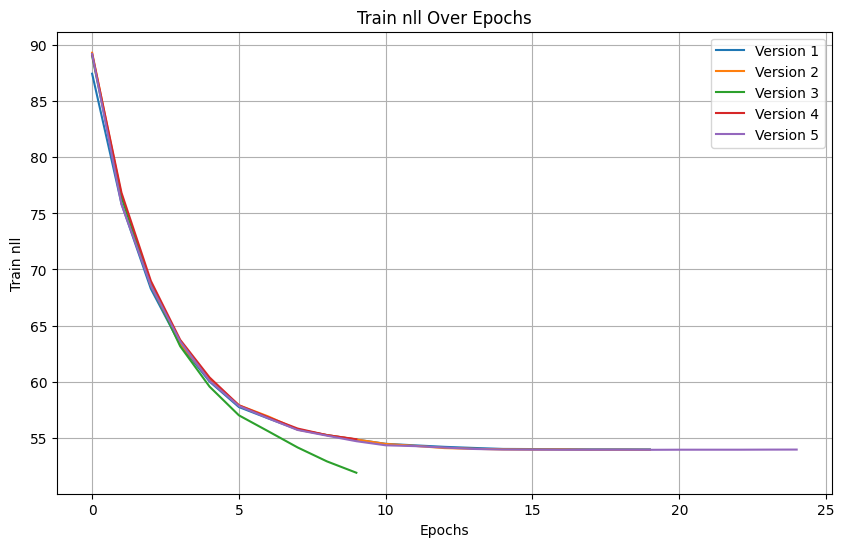

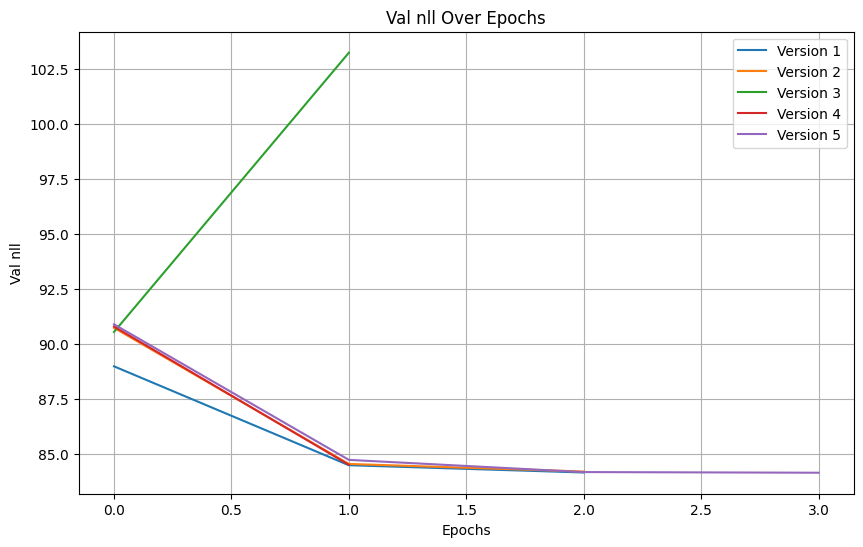

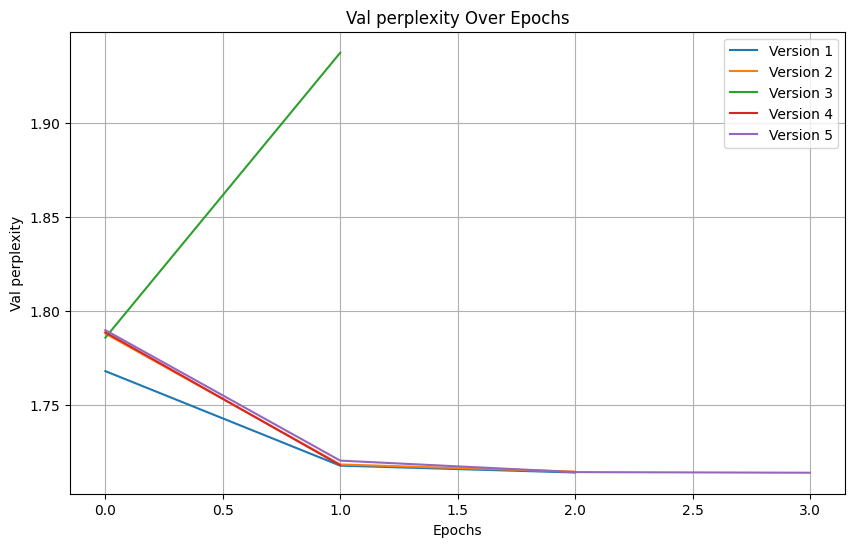

In [9]:
# Versions to compare
versions = [1, 2, 3, 4, 5]

# Load histories
histories = load_all_histories(save_dir, pf, versions)

# Plot training loss
plot_training_behavior(histories, metric="train_nll")
plot_training_behavior(histories, metric="val_nll")

# Plot validation perplexity
plot_training_behavior(histories, metric="val_perplexity")